# Interpretability of Contact-Rich Manipulation Tasks via Visualization

## Setup and Configuration

In [1]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time 
import importlib

import utils
import image_render_code as imgutils
import dataloader_utils as dui
import grad_cam_videos
import pytorch_gradcam
import train_utils
import networks
import pickle

from matplotlib.colors import LinearSegmentedColormap

#Paths and Experiment Configuration
#For binary class test, relative displacement 2D version.
train_path = '../data/cutting_datasets/train'
test_path = '../data/cutting_datasets/test'
'''
To run the generalization version of the experiments (with missing object types in the training set), use
train_path = '../data/cutting_datasets/generalization_train'
test_path = '../data/cutting_datasets/generalization_test'
'''
trained_model_name = 'CLSTM__im3_cl3_chu32_cks(1, 5)/model_best' #name of the trained model to be evaulated

#define input characteristics, and what time horizon the prediction is made for
#These values are from the original experiment
horizon = 3 
block_size = 10
batch_size = 32
cnnColorMap="seismic" #colormap to be used for input rendering

#How to handle images
saveIndivImgs = True #set to True to save the individual frame insepaction images instead of viewing them
saveFeatEvalImgs = True #set to false to only display the feature evaluation images without saving them
indivImgSavePath = '../GradCamFigs/' #where to save the individual visually interpretable images
featEvalSavePath = '../FeatureEvaluationFigs/' #where to save the feature evaluation images
saved_config = pickle.load(open("trained_models/"+trained_model_name.split('/model')[0]+"/config.p", "rb"))
print("opened config at: ", "trained_models/"+trained_model_name.split('/model')[0]+"/config.p")

opened config at:  trained_models/CLSTM__im3_cl3_chu32_cks(1, 5)/config.p


## Load Data

In [2]:

# initialize dataloaders
train_dl = dui.EventDataloader(train_path, dataType="train", block_size = block_size, scale_pixels=1, multi_class = False, block_horizon=horizon, colormap=cnnColorMap,imgs_out=saved_config['imgs_out'])
train_loader = torch.utils.data.DataLoader(train_dl, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True, drop_last=True)

# Pass the training data scaler params to the testing loader
scaler = train_dl.dh.scaler
gradcam_scaler_params = train_dl.dh.gradcam_scaler_params
test_dl = dui.EventDataloader(test_path, dataType="visual", block_size = block_size, scaler = scaler, gradcam_scaler_params = gradcam_scaler_params, scale_pixels=1, multi_class = False, block_horizon=horizon, colormap=cnnColorMap,imgs_out=saved_config['imgs_out'])
gc_test_loader = torch.utils.data.DataLoader(test_dl, batch_size=1, shuffle=False, num_workers=2, pin_memory=True, drop_last=True)


Retrieved 34 position files, 34 force files and 34 input files from base directory '../data/cutting_datasets/train' 
0 files need to be fixed
Retrieved 10 position files, 10 force files and 10 input files from base directory '../data/cutting_datasets/test' 
0 files need to be fixed


## Load trained model

In [3]:
if(torch.cuda.is_available()):
    device = torch.device("cuda") 
else:
    device = torch.device("cpu")

#model definition must be same as saved model

model = networks.CLSTMEventNet(num_classes = 2, image_size=(9,10),\
                           channels=3,conv_kernel_size=saved_config["clstm_kernel_size"],\
                           top_layer=True, avg_pool=False, max_pool=False,batch_normalization = False,\
                           lstm_layers=saved_config["clstm_layers"],step=saved_config['imgs_out'],\
                           conv_stride=1,device=device,\
                           effective_step=range(saved_config['imgs_out']),nb_lstm_units=saved_config["clstm_hidden_units"]).to(device).float()
model_name = trained_model_name
trainer_chkp = train_utils.TrainUtils(model, None, None, None, None, None)
trainer_chkp.loadModel(model_name)
model = trainer_chkp.model

use entire sequence is:  False
shape of FC is:  Linear(in_features=2880, out_features=2, bias=True)


## Individual Gradcam Inspection Version

net out is  tensor([0.0351, 0.9649], device='cuda:0', grad_fn=<SelectBackward>) 1
model_outs is:  tensor([[0.0351, 0.9649]], device='cuda:0', grad_fn=<SoftmaxBackward>)
avg cam shape is:  (9, 10)
net out is  tensor([0.0256, 0.9744], device='cuda:0', grad_fn=<SelectBackward>) 1
model_outs is:  tensor([[0.0256, 0.9744]], device='cuda:0', grad_fn=<SoftmaxBackward>)
avg cam shape is:  (9, 10)
net out is  tensor([0.2385, 0.7615], device='cuda:0', grad_fn=<SelectBackward>) 1
model_outs is:  tensor([[0.2385, 0.7615]], device='cuda:0', grad_fn=<SoftmaxBackward>)
avg cam shape is:  (9, 10)
net out is  tensor([0.9564, 0.0436], device='cuda:0', grad_fn=<SelectBackward>) 0
model_outs is:  tensor([[0.9564, 0.0436]], device='cuda:0', grad_fn=<SoftmaxBackward>)
avg cam shape is:  (9, 10)
net out is  tensor([1.0000, 0.0000], device='cuda:0', grad_fn=<SelectBackward>) 0
model_outs is:  tensor([[1.0000, 0.0000]], device='cuda:0', grad_fn=<SoftmaxBackward>)
avg cam shape is:  (9, 10)
net out is  tensor([

net out is  tensor([0.0001, 0.9999], device='cuda:0', grad_fn=<SelectBackward>) 1
model_outs is:  tensor([[0.0001, 0.9999]], device='cuda:0', grad_fn=<SoftmaxBackward>)
avg cam shape is:  (9, 10)
net out is  tensor([0.0001, 0.9999], device='cuda:0', grad_fn=<SelectBackward>) 1
model_outs is:  tensor([[0.0001, 0.9999]], device='cuda:0', grad_fn=<SoftmaxBackward>)
avg cam shape is:  (9, 10)
net out is  tensor([0.0002, 0.9998], device='cuda:0', grad_fn=<SelectBackward>) 1
model_outs is:  tensor([[0.0002, 0.9998]], device='cuda:0', grad_fn=<SoftmaxBackward>)
avg cam shape is:  (9, 10)
net out is  tensor([0.0002, 0.9998], device='cuda:0', grad_fn=<SelectBackward>) 1
model_outs is:  tensor([[0.0002, 0.9998]], device='cuda:0', grad_fn=<SoftmaxBackward>)
avg cam shape is:  (9, 10)
net out is  tensor([0.0002, 0.9998], device='cuda:0', grad_fn=<SelectBackward>) 1
model_outs is:  tensor([[0.0002, 0.9998]], device='cuda:0', grad_fn=<SoftmaxBackward>)
avg cam shape is:  (9, 10)
net out is  tensor([

Process Process-1:
Process Process-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/manttari/anaconda3/envs/smth/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/manttari/anaconda3/envs/smth/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/manttari/anaconda3/envs/smth/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/manttari/anaconda3/envs/smth/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/manttari/anaconda3/envs/smth/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/home/manttari/anaconda3/envs/smth/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(t

net out is  tensor([1.0000e+00, 2.9291e-13], device='cuda:0', grad_fn=<SelectBackward>) 0
model_outs is:  tensor([[1.0000e+00, 2.9291e-13]], device='cuda:0', grad_fn=<SoftmaxBackward>)
avg cam shape is:  (9, 10)


KeyboardInterrupt: 

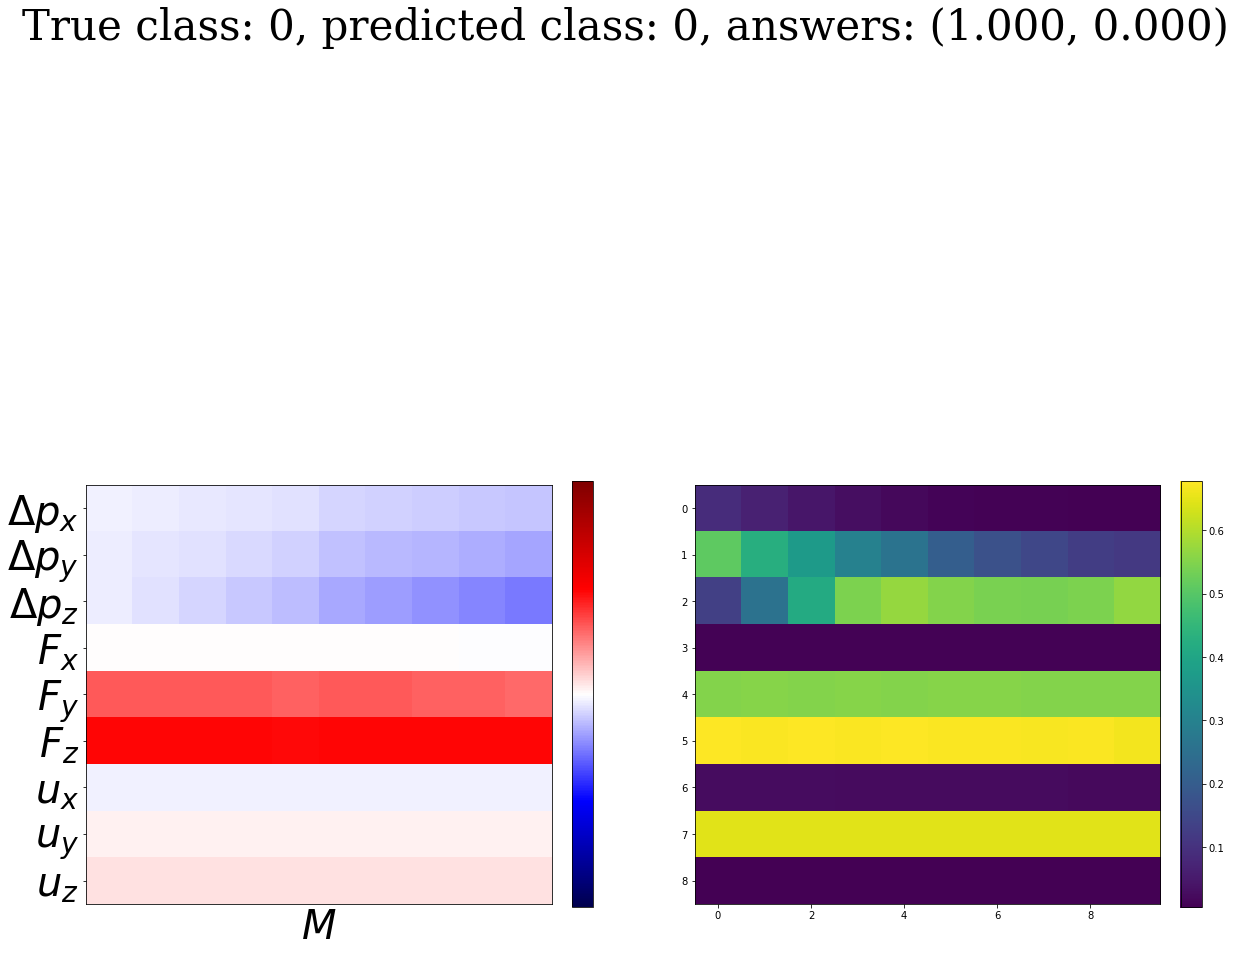

In [4]:
importlib.reload(grad_cam_videos)
importlib.reload(pytorch_gradcam)
plot_labels = ["$\Delta p_x$", "$\Delta p_y$", "$\Delta p_z$", "$F_x$", "$F_y$", "$F_z$", "$u_x$", "$u_y$", "$u_z$" ]

#Gradcam image upscaling factor (if desired)
cellSize = [10,10]
model = model.to(device)

#create a gradCam instance with hooks to correct layers
gradcamObj = grad_cam_videos.GradCamVideo(model, class_dict=None, target_layer_names = "clstm",\
                                   use_cuda = False if device == torch.device("cpu") else True,\
                                   archType = "CLSTM", input_spatial_size=(9,10))

model = model.float()
model.eval()

for i, data in enumerate(gc_test_loader):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data[0]
    inputs = inputs.to(device)
    labels = labels.to(device)
    netOut = model(inputs.float())[0]
    print("net out is ", netOut, torch.argmax(netOut).item())
    cam_indivs, model_outs = gradcamObj(inputs.float(), torch.argmax(netOut).item())    
    print("model_outs is: ", model_outs)
    
    #for frame_idx in range(len(cam_indivs)):
       
    #    print("cam max is: ", np.max(cam[frame_idx]))
    cam = np.mean(np.array(cam_indivs),axis=0)
    print("avg cam shape is: ", cam.shape)
    origImage = data[1][0][-1]
    multicolor_img = np.moveaxis(origImage.cpu().numpy(),0,-1)
    multicolor_img = multicolor_img.squeeze()  
    combined = pytorch_gradcam.show_cam_on_image(multicolor_img, cam)

    #increase to area size along time axis
    imgOut = np.repeat(combined, cellSize[0],axis=1)
    #increase to area size along feature axis
    imgOut = np.repeat(imgOut, cellSize[1],axis=0)
        

        #cam_complement, model_outs = gradcamObj(inputs.float(), torch.argmin(netOut).item())
    frame_idx=len(cam_indivs)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,20), sharex= False, sharey=False)
    fig.suptitle('True class: %d, predicted class: %d, answers: (%.3f, %.3f)' %(labels[0],torch.argmax(netOut), netOut[0], netOut[1]), fontname = 'serif', fontsize = 42)

    im1 = ax1.imshow(multicolor_img, cmap = 'seismic')
    cb1 = fig.colorbar(im1, ax = ax1, fraction = 0.042, pad=0.04)
    cb1.set_ticks([])   
    ax1.set_yticks(np.arange(len(multicolor_img)))
    ax1.set_yticklabels(plot_labels, fontsize = 40)
    ax1.set_xticks([])
    ax1.set_xlabel("$M$", fontsize = 40)

    im2 = ax2.imshow(cam)
    cb2 = fig.colorbar(im2, ax = ax2, fraction = 0.042, pad = 0.04)
    cb2.set_ticks([])
    ax2.set_yticks(np.arange(len(cam)))
    ax2.set_yticklabels(plot_labels, fontsize = 40)   
    ax2.set_xticks([])
    ax2.set_xlabel("$M$", fontsize = 40)


    fig.tight_layout()
    fig.subplots_adjust(top=1.5)

    if(saveIndivImgs):
        path = indivImgSavePath
        path = path + model_name + '/'

        if not os.path.exists(path):
            os.makedirs(path)

        fna = str(i+(frame_idx-1)) + "_" + str(frame_idx)
        name = path + fna + ".pdf"
        name2 = path + fna + '.png'
        plt.savefig(name, bbox_inches = 'tight', pad_inches = 0)
        plt.savefig(name2, bbox_inches = 'tight')
    else:
        plt.show()
        #only show max 25 example images if displaying instead of saving
        if(i+1==25):
            break

    plt.close()
        

## GradCam Intensity Version

In [5]:
importlib.reload(grad_cam_videos)
importlib.reload(pytorch_gradcam)
plot_labels = ["$\Delta p_x$", "$\Delta p_y$", "$\Delta p_z$", "$F_x$", "$F_y$", "$F_z$", "$u_x$", "$u_y$", "$u_z$" ]

#Gradcam image upscaling factor (if desired)
cellSize = [10,10]

model = model.to(device)

#create a gradCam instance with hooks to correct layers
gradcamObj = grad_cam_videos.GradCamVideo(model, class_dict=None, target_layer_names = "clstm",\
                                   use_cuda = False if device == torch.device("cpu") else True,\
                                   archType = "CLSTM", input_spatial_size=(9,10))

model = model.float()
model.eval()

#instantiate feature evaluator for compiling intensity results
featureEvaluator = pytorch_gradcam.FeatureEvaluator(featureThreshold=0.7)

for i, data in enumerate(gc_test_loader):
        # get the inputs; data is a list of [inputs, labels]
        if((i+1)%250==0):
            print("evaluated ",i,"/",len(gc_test_loader))
          
        inputs, labels = data[0]
        inputs = inputs.to(device)
        labels = labels.to(device)
        netOut = model(inputs.float())[0]
        #print("net out is ", netOut, torch.argmax(netOut).item())
        cam_indivs, model_outs = gradcamObj(inputs.float(), torch.argmax(netOut).item())    
        
        cam = np.mean(np.array(cam_indivs),axis=0)
        #print("avg cam shape is: ", cam.shape)
        origImage = data[1][0][-1]
        multicolor_img = np.moveaxis(origImage.cpu().numpy(),0,-1)
        multicolor_img = multicolor_img.squeeze()  
        combined = pytorch_gradcam.show_cam_on_image(multicolor_img, cam)
        
        #increase to area size along time axis
        imgOut = np.repeat(combined, cellSize[0],axis=1)
        #increase to area size along feature axis
        imgOut = np.repeat(imgOut, cellSize[1],axis=0)
        
        netOut = model(inputs.float())[0]
        featureEvaluator.update(torch.argmax(netOut),labels[0],cam)

print("-------------------")
featureEvaluator.showResults()

evaluated  249 / 2823
evaluated  499 / 2823
evaluated  749 / 2823
evaluated  999 / 2823
evaluated  1249 / 2823
evaluated  1499 / 2823
evaluated  1749 / 2823
evaluated  1999 / 2823
evaluated  2249 / 2823
evaluated  2499 / 2823
evaluated  2749 / 2823
-------------------
out of 1139 TP cases, features above 0.700000 were: 
P_x:  4
P_y:  8
P_z:  21
F_x:  0
F_y:  30
F_z:  15
U_x:  0
U_y:  87
U_z:  0
-----------------
out of 1176 TN cases, features above 0.700000 were: 
P_x:  0
P_y:  0
P_z:  0
F_x:  36
F_y:  20
F_z:  0
U_x:  13
U_y:  0
U_z:  272
-----------------
out of 203 FP cases, features above 0.700000 were: 
P_x:  0
P_y:  0
P_z:  0
F_x:  0
F_y:  2
F_z:  0
U_x:  0
U_y:  8
U_z:  0
-----------------
out of 305 FN cases, features above 0.700000 were: 
P_x:  0
P_y:  0
P_z:  0
F_x:  19
F_y:  0
F_z:  0
U_x:  3
U_y:  0
U_z:  84
-----------------
____________________________________________
out of 1139 TP cases, the most cared about feature was: 
P_x:  18
P_y:  475
P_z:  31
F_x:  0
F_y:  70
F_z

### Display Histograms

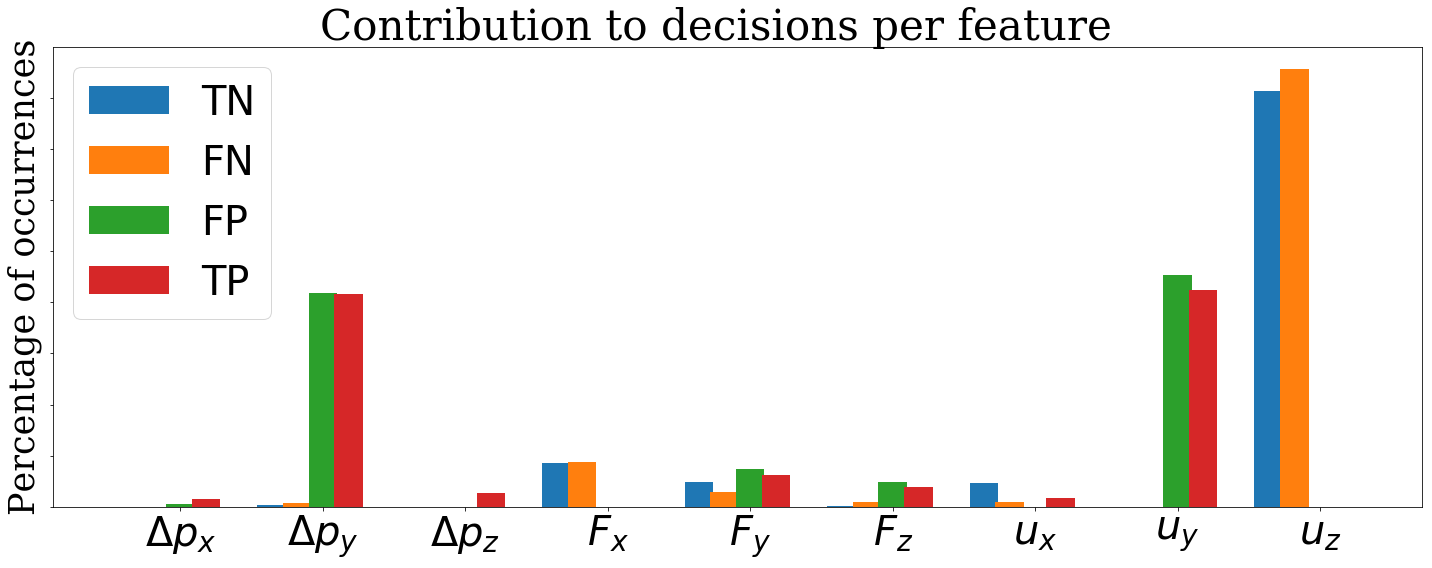

In [6]:
import pickle
import numpy as np
plot_labels = ["$\Delta p_x$", "$\Delta p_y$", "$\Delta p_z$", "$F_x$", "$F_y$", "$F_z$", "$u_x$", "$u_y$", "$u_z$" ]
FP = np.array(featureEvaluator.featureCountsMax['FP'])/featureEvaluator.caseCounts['FP']
TP = np.array(featureEvaluator.featureCountsMax['TP'])/featureEvaluator.caseCounts['TP']
FN = np.array(featureEvaluator.featureCountsMax['FN'])/featureEvaluator.caseCounts['FN']
TN = np.array(featureEvaluator.featureCountsMax['TN'])/featureEvaluator.caseCounts['TN']

ind = np.arange(len(FP))  # the x locations for the groups
width = 0.2# the width of the bars

fig, ax = plt.subplots(figsize = (20, 8))
fig.suptitle('Contribution to decisions per feature', fontname = 'serif', fontsize = 42)

offset = 0.36
rects1 = ax.bar(ind-offset, TN, width,
                label='TN')
rects2 = ax.bar(ind - offset/2, FN, width, 
                label='FN')
rects3 = ax.bar(ind , FP, width,
                label='FP') 
rects4 = ax.bar(ind + offset/2, TP, width,
                label='TP')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of occurrences', fontname = 'serif', fontsize = 35)
ax.set_xticks(ind)
ax.set_xticklabels(plot_labels, fontsize = 40)
ax.legend(fontsize = 40)
ax.set_yticklabels(labels = [], fontsize = 40)

fig.tight_layout()
fig.subplots_adjust(top=0.91)

if(saveFeatEvalImgs):
    path = featEvalSavePath
    if not os.path.exists(path):
        os.makedirs(path)
    if not os.path.exists(path + model_name):
        os.makedirs(path + model_name)
    fna = model_name +'_per-feat.pdf'
    
    name = path + fna
    name2 = path + model_name +'_per-feat.png'
    plt.savefig(name, bbox_inches = 'tight', pad_inches = 0)
    plt.savefig(name2, bbox_inches = 'tight')
    pickle.dump(featureEvaluator,open(path + model_name +'/featEval.p',"wb"))
plt.show()
plt.close()



In [13]:
path ="/home/manttari/Projects/interpretable_manipulation/scripts/trained_models/"
bestF1 = 0
bestName = ""
worstF1 = 1
worstName = ""
for x in os.walk(path):
    if("chu" not in x[0]):
        continue
    
    try:
        F1s = pickle.load(open(x[0]+"/validation_F1s.p","rb"))
    except:
        continue
    #tF1s = pickle.load(open(x[0]+"/validation_F1s.p","rb"))
    #print(F1s)
    currBest = np.max(F1s)
    currWorst = np.min(F1s)
    print(x[0]," has : ", currBest)
    if(currBest>bestF1):
        bestName = x[0]
        bestF1 = currBest
    if(currBest<worstF1):
        worstName = x[0]
        worstF1 = currBest
        
print("worst F1 was (test,train)", worstF1, np.max(pickle.load(open(worstName+"/train_F1s.p","rb")))," by :", worstName)
print("best F1 was (test,train)", bestF1, np.max(pickle.load(open(bestName+"/train_F1s.p","rb")))," by :", bestName)

/home/manttari/Projects/interpretable_manipulation/scripts/trained_models/CLSTM__im7_cl3_chu16_cks(1, 5)  has :  0.8248731599003309
/home/manttari/Projects/interpretable_manipulation/scripts/trained_models/CLSTM__im3_cl1_chu32_cks(1, 5)  has :  0.3484339671942323
/home/manttari/Projects/interpretable_manipulation/scripts/trained_models/CLSTM__im7_cl1_chu16_cks(1, 3)  has :  0.8232195754487696
/home/manttari/Projects/interpretable_manipulation/scripts/trained_models/CLSTM__im7_cl3_chu64_cks(1, 5)  has :  0.3484339671942323
/home/manttari/Projects/interpretable_manipulation/scripts/trained_models/CLSTM__im5_cl1_chu64_cks(1, 5)  has :  0.3484339671942323
/home/manttari/Projects/interpretable_manipulation/scripts/trained_models/CLSTM__im5_cl3_chu16_cks(1, 3)  has :  0.8377082140839298
/home/manttari/Projects/interpretable_manipulation/scripts/trained_models/CLSTM__im3_cl1_chu32_cks(1, 3)  has :  0.8347971443499241
/home/manttari/Projects/interpretable_manipulation/scripts/trained_models/CL

In [22]:
import sklearn.metrics as sklm
labels_list = [0,0,1,1,1]
predictions_list = [0,1,1,1,0]
derp = sklm.classification_report(labels_list, predictions_list,output_dict=True)
print(derp)

{'0': {'precision': 0.5, 'recall': 0.5, 'f1-score': 0.5, 'support': 2}, '1': {'precision': 0.6666666666666666, 'recall': 0.6666666666666666, 'f1-score': 0.6666666666666666, 'support': 3}, 'micro avg': {'precision': 0.6, 'recall': 0.6, 'f1-score': 0.6, 'support': 5}, 'macro avg': {'precision': 0.5833333333333333, 'recall': 0.5833333333333333, 'f1-score': 0.5833333333333333, 'support': 5}, 'weighted avg': {'precision': 0.6, 'recall': 0.6, 'f1-score': 0.6, 'support': 5}}
